In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from jugaad_data.nse import stock_df
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = stock_df(symbol="SBIN", from_date=date(2015,1,1),to_date=date(2020,1,30), series="EQ")

In [3]:
df.head()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2020-01-30,EQ,316.75,316.75,305.65,316.45,310.00,310.70,311.18,373.8,244.35,35802330,1.114102e+10,227687,SBIN
1,2020-01-29,EQ,317.85,319.70,315.55,315.10,316.95,316.45,317.75,373.8,244.35,23914114,7.598704e+09,143297,SBIN
2,2020-01-28,EQ,317.95,320.00,311.05,316.20,316.40,315.10,316.67,373.8,244.35,26488426,8.388015e+09,173879,SBIN
3,2020-01-27,EQ,320.90,322.00,315.80,324.05,316.40,316.20,318.82,373.8,244.35,23309355,7.431558e+09,148768,SBIN
4,2020-01-24,EQ,323.50,327.30,321.15,323.20,324.30,324.05,325.15,373.8,244.35,22706879,7.383247e+09,146667,SBIN


In [5]:
stockprices = df[['DATE', 'SYMBOL', 'OPEN', 'PREV. CLOSE', 'LOW', 'HIGH', 'VOLUME']]

In [7]:
test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))
print(f"train_size: {train_size}")
print(f"test_size: {test_size}")

train = stockprices[:train_size][["PREV. CLOSE"]]
test = stockprices[train_size:][["PREV. CLOSE"]]

train_size: 1000
test_size: 250


In [17]:
def plotter(code):
    global closing_stock , opening_stock
    
    #Opening Price Plot
    
    plt.subplot(2,1,1)
    company = df[df['SYMBOL'] == code]
    company = company['OPEN'].values.astype('float32')
    company = company.reshape(-1,1)
    opening_stock = company
    
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + '  Open stock prices')
    plt.title('Price X Time' + code)
    plt.plot(company,'g')
    plt.show()
    
    #Closing Price Plot
    plt.subplot(2,1,2)
    company_close = df[df['SYMBOL'] == code]
    company_close = company_close['CLOSE'].values.astype('float32')
    company_close = company_close.reshape(-1,1)
    closing_stock = company_close
    
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + '  Close Stock Prices')
    plt.title('Price X Time for  '+ code)
    plt.plot(company_close,'b')
    plt.show()
    

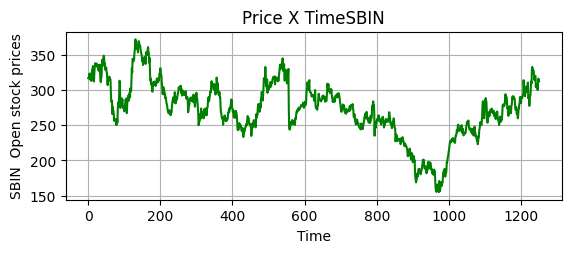

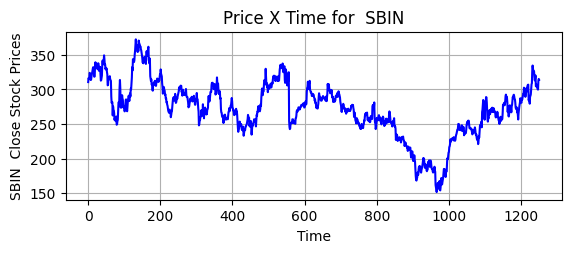

In [18]:
plotter('SBIN')

In [19]:
stocks = np.array(data[data['SYMBOL'].isin(['SBIN'])]['PREV. CLOSE'])

stocks

array([316.45, 315.1 , 316.2 , ..., 315.25, 314.  , 311.85])

In [20]:
stocks = stocks.reshape(-1,1)
stocks.shape

(1251, 1)

In [21]:
mms = MinMaxScaler(feature_range=(0,1))
stocks = mms.fit_transform(stocks)
stocks

array([[0.74637353],
       [0.74025385],
       [0.74524025],
       ...,
       [0.74093382],
       [0.73526745],
       [0.72552131]])

In [23]:
train_len = int(len(stocks) * 0.8)
train_len

1000

In [24]:
test_len = len(stocks) - train_len
test_len

251

In [25]:
train = stocks[0:train_len]
print(train.shape)

(1000, 1)


In [26]:
test = stocks[train_len:]
print(test.shape)

(251, 1)


In [27]:
def process_data(data , n_features):
    dataX , dataY = [],[]
    for i in range(len(data) - n_features):
        a = data[i : (i + n_features),0]
        dataX.append(a)
        dataY.append(data[i + n_features,0 ])
    return np.array(dataX) , np.array(dataY)

In [28]:
n_features = 5
trainX , trainY = process_data(train , n_features)
print(trainX.shape , trainY.shape)

(995, 5) (995,)


In [29]:
testX , testY = process_data(test , n_features)
print(testX.shape , testY.shape)

(246, 5) (246,)


In [30]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1246, 5) (1246,)


In [31]:
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

In [32]:
def calculate_mape(y_true, y_pred):
#Mean Absolute Percentage Error (MAPE) %
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [33]:
def calculate_perf_metrics(var):
    rmse = calculate_rmse(
        np.array(stockprices[train_size:]["Close"]),
        np.array(stockprices[train_size:][var]),
    )
    mape = calculate_mape(
        np.array(stockprices[train_size:]["Close"]),
        np.array(stockprices[train_size:][var]),
    )
    run["RMSE"] = rmse
    run["MAPE (%)"] = mape

    return rmse, mape